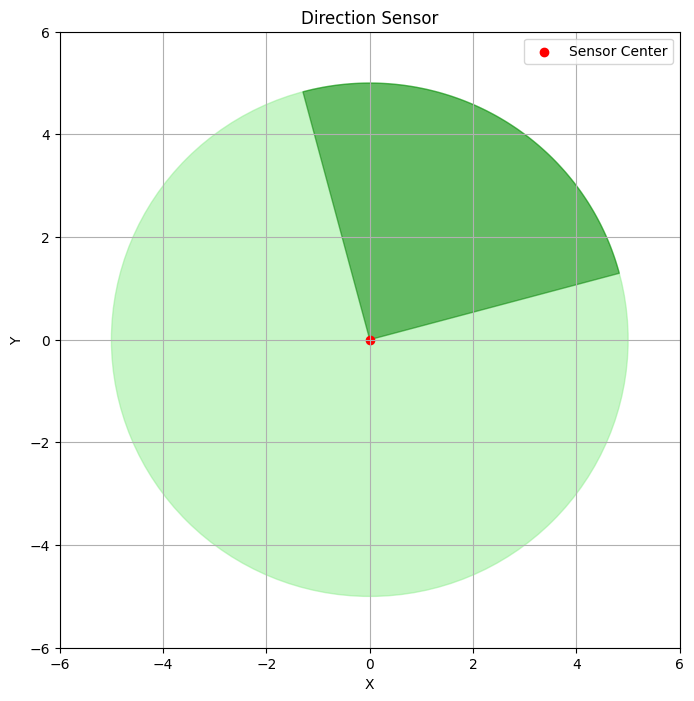

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def draw_direction_sensor(x, y, R, start_angle):
    # Chuẩn hóa góc quay bắt đầu trong khoảng 0 đến 360 độ và thêm 90 độ
    start_angle = (start_angle ) % 360

    # Tạo đồ thị và vẽ direction sensor
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Vẽ đường tròn
    circle = plt.Circle((x, y), R, color='lightgreen', fill=True, alpha=0.5)
    ax.add_patch(circle)

    # Tính các điểm tạo nên vùng bao phủ
    angles = np.linspace(start_angle-45, start_angle + 45, 100)
    x_cover = x + R * np.cos(np.radians(angles))
    y_cover = y + R * np.sin(np.radians(angles))

    # Vẽ sector
    sector_points = np.vstack([[x, y], np.column_stack([x_cover, y_cover])])
    sector = plt.Polygon(sector_points, color='green', alpha=0.5)
    ax.add_patch(sector)

    # Vẽ tâm sensor
    plt.scatter(x, y, color='red', label='Sensor Center')

    plt.xlim(x - R - 1, x + R + 1)
    plt.ylim(y - R - 1, y + R + 1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Direction Sensor')
    plt.legend()
    plt.grid(True)
    plt.show()

# Tham số của direction sensor
x = 0  # Tọa độ x của tâm sensor
y = 0  # Tọa độ y của tâm sensor
R = 5  # Bán kính sensor
start_angle = 60  # Góc bắt đầu (trùng với trục Ox)

# Vẽ direction sensor
draw_direction_sensor(x, y, R, start_angle)


In [ ]:
result_path = "results/results.json"
target_path = "test/test.inp"

In [4]:

import json

sensors = []
targets = []
with open(result_path) as json_file:
    # Step 2: Load the JSON data from the file
    data = json.load(json_file)
actives = data['Activation_vector']
angles = data['Sensor_angles']

with open(target_path) as f:

    theta = float(f.readline()) * np.pi / 180
    radius = float(f.readline())
    f.readline()

    n = int(f.readline())
    m = int(f.readline())

    for i in range(n):
        x, y, a = f.readline().split(',')
        target = (float(x), float(y), float(a))
        targets.append(target)

    for j in range(m):
        x, y = f.readline().split(',')
        sensor = (float(x), float(y),radius,angles[j], actives[j])
        sensors.append(sensor)


In [5]:
targets

[(2.0, 2.0, 3.0), (7.0, 7.0, 1.0)]

In [6]:
sensors

[(5.0, 5.0, 5.0, 3.605757644735396, False),
 (5.0, 2.0, 5.0, 2.995334578209361, True),
 (3.0, 2.0, 5.0, 2.9189732910433426, True),
 (3.0, 3.0, 5.0, 3.9076647324097378, True),
 (9.0, 9.0, 5.0, 4.28199301589113, True),
 (10.0, 10.0, 5.0, 3.6021754733254108, False),
 (20.0, 20.0, 5.0, 4.238807549082433, False),
 (50.0, 50.0, 5.0, 3.5487167886409865, False),
 (30.0, 30.0, 5.0, 5.620848232472676, False),
 (25.0, 25.0, 5.0, 2.892181072086464, False)]

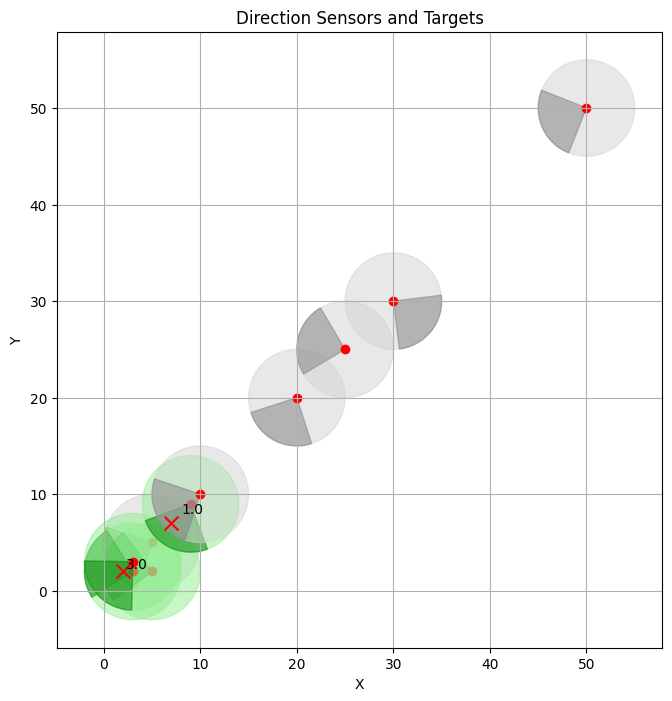

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def draw_direction_sensor(x, y, R, start_angle,active, ax):
    # Chuẩn hóa góc quay bắt đầu trong khoảng 0 đến 360 độ và thêm 90 độ
    start_angle = (start_angle ) % (2*np.pi)
    
    # Tính các điểm tạo nên vùng bao phủ
    angles = np.linspace(start_angle-np.pi/4, start_angle + np.pi/4, 100)
    x_cover = x + R * np.cos(angles)
    y_cover = y + R * np.sin(angles)

   # Vẽ đường tròn
    if active:
        circle = plt.Circle((x, y), R, color='lightgreen', fill=True, alpha=0.5)
    else:
        circle = plt.Circle((x, y), R, color='lightgray', fill=True, alpha=0.5)
    ax.add_patch(circle)
    # Vẽ sector
    if active:
        sector_points = np.vstack([[x, y], np.column_stack([x_cover, y_cover])])
        sector = plt.Polygon(sector_points, color='green', alpha=0.5)
    else:
        sector_points = np.vstack([[x, y], np.column_stack([x_cover, y_cover])])
        sector = plt.Polygon(sector_points, color='gray', alpha=0.5)


    ax.add_patch(sector)
    plt.scatter(x, y, color='red', label='Sensor Center')

def draw_target(x, y, no_cover):
    plt.scatter(x, y, color='red', marker='x', s=100,label=f'Target ({no_cover} no_cover)')
    plt.annotate(f"{no_cover}", (x, y), xytext=(x, y), textcoords='offset points')

def draw_sensors_and_targets(sensor_list, target_list):
    plt.figure(figsize=(8, 8))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')

    for sensor in sensor_list:
        x, y, R, start_angle, active = sensor
        draw_direction_sensor(x, y, R, start_angle,active, ax)

    for target in target_list:
        x, y,nocover = target
        draw_target(x, y,nocover)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Direction Sensors and Targets')
    plt.grid(True)
    plt.show()




# Vẽ direction sensors và targets
draw_sensors_and_targets(sensors, targets)
